<h1 align=center><font size = 5>MACHINE LEARNING ALGORITHMS PREDICTION</font></h1> 

Application of Hybrid algorithm in machine learning algorithm for prediction. We will use medical health Insurance dataset generated from an online source "Kaggle dataset"

**The project involves building a machine learning algorithm/model to predict whether a patient will apply for health insurance or not..**

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. Importing the required libraries   
2. Reading the data 
3. Preprocessing and visualization
4. Model building
5. Model Training
6. Model Evaluation
7. Algorithm Selection: Logistic Regression, Random Forest, Decision Tree, Support Vector Machine
</font>
</div>

Import Python modules
We need to import some packages that will enable us to explore the data and build machine learning models


# 1. Importing the required libraries

In [2]:
#Importing the required libraries
import numpy as np # for linear algebra/data preprocessing
import pandas as pd # for data preprocessing
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

# 2. READ THE DATASET

In [3]:
#Reading the data as a .csv file and checking the first 20 observations
health_insurance = pd.read_csv("medical_health_insurance_dataset.csv")

health_insurance.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


# 3. Preprocessing and visualization

DROPPING A COLUMN/FEATURE THAT IS NOT USEFUL FOR PREDICTION/MODELING

The User ID is a random number generated for every customer that comes to the company for medical insurance. Therefore, it is not useful in prediciting whether the person will buy medical insurance or not. It will hence be removed from the data, as it is not useful for modeling.

In [4]:
#Dropping User ID column
health_insurance.drop(["User ID"], axis="columns", inplace = True)

Next, we **transform or Encode** the Target column 'Purchased' to **discrete values 1 representing purchased and 0 representing "not-purchased"**.This will transform the output variable (label) to be numeric values, which is important for a machine learning model.


This above line of code is performing an operation on a DataFrame called **health_insurance**.

- **drop():** This is a method used to remove specific rows or columns from a DataFrame. It's typically used to eliminate unnecessary or redundant data.

- **["User ID"]**: This specifies the label of the column to be dropped. In this case, it's "User ID", indicating that the column named "User ID" will be removed.

- **axis="columns"**: This parameter specifies whether to drop rows or columns. Here, axis="columns" indicates that the operation is applied to columns. Alternatively, you could use axis=1, which is equivalent.

- **inplace=True**: This parameter determines whether the operation will be applied directly to the DataFrame or if a new DataFrame will be returned. When inplace=True, the operation is performed on the original DataFrame, and it's modified in place. If **inplace=False** or not specified, the operation returns a new DataFrame without modifying the original one.

So, altogether, the line of code is dropping the **"User ID"** column from the health_insurance DataFrame, and the change is being applied directly to the **original DataFrame**. After executing this line, the "User ID" column will no longer be present in the health_insurance DataFrame.

**Mapping the values 1 and to transfrom the target column**

In [5]:
#Mapping the values 1 and to transfrom the target column
health_insurance["Purchased"] = health_insurance["Purchased"].apply(lambda x: 1 if x == "purchased" else 0)

The provided code is performing a transformation on the "Purchased" column in a DataFrame called health_insurance. 

**Let's break down the code step by step:**

**health_insurance["Purchased"]:** This selects the "Purchased" column from the DataFrame health_insurance.

**.apply(lambda x: 1 if x == "purchased" else 0):** This applies a function to each element of the **"Purchased"** column. 


**Here's what's happening inside the lambda function:**

- **lambda x:**: This defines an anonymous function that takes one argument, denoted as x.
- **1 if x == "purchased" else 0:** This is a ternary expression that checks if the value of x is equal to "purchased". If it is, the function **returns 1**; otherwise, it **returns 0**.

In [18]:
#Let's read the data ones again
health_insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


Next, we transform or Encode the Target column 'Purchased' to discrete values 1 representing purchased and 0 representing "not-purchased".This will transform the output variable (label) to be numeric values, which is important for a machine learning model.

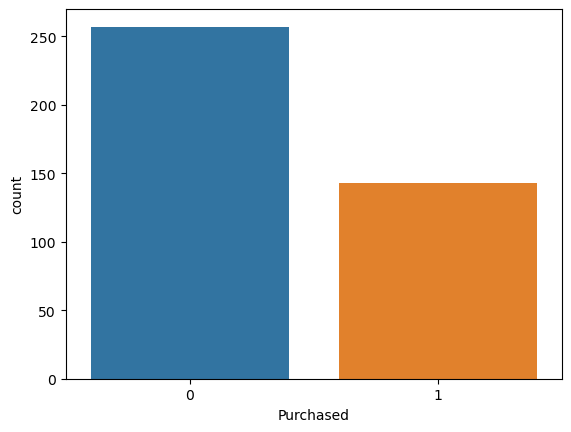

In [7]:
sns.countplot(x = "Purchased", data = health_insurance);

As you can see, the majority of those that visit the medical health insurance company did not want to buy the insurance. This is an example of class imbalance. That is, there is no equal proportion of those that will buy or not.

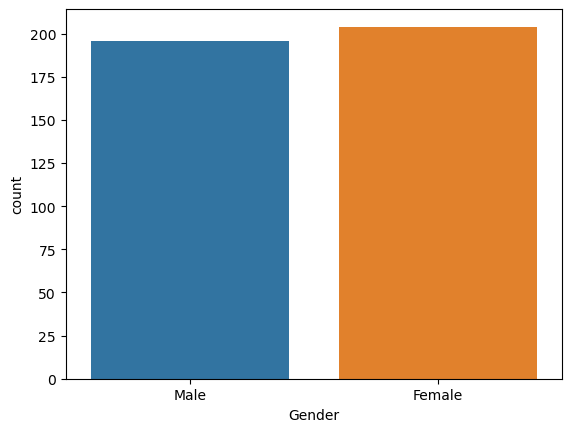

In [8]:
sns.countplot(x = "Gender", data = health_insurance);

The proportion of males are almost the same as females.

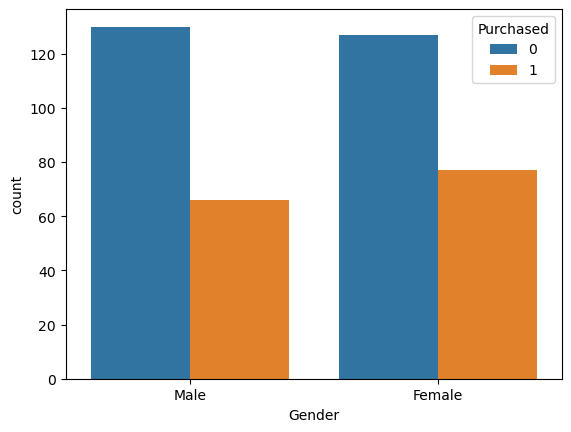

In [9]:
sns.countplot(x = "Gender", hue = "Purchased", data = health_insurance);

It appears that females wanted to purchase the insurance when compared with males.

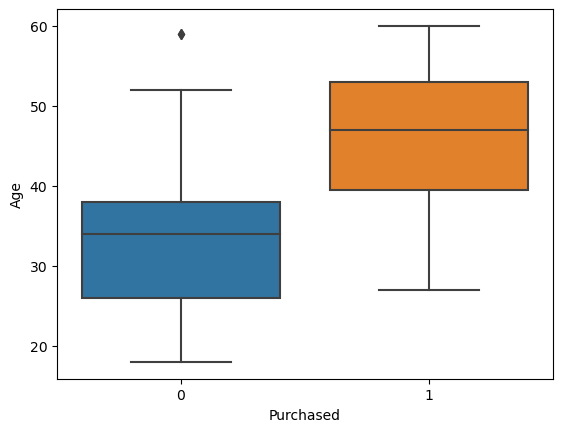

In [10]:
sns.boxplot(x = "Purchased", y = "Age", data = health_insurance);

From the look of things, older people purchased insurance compared with younger people.

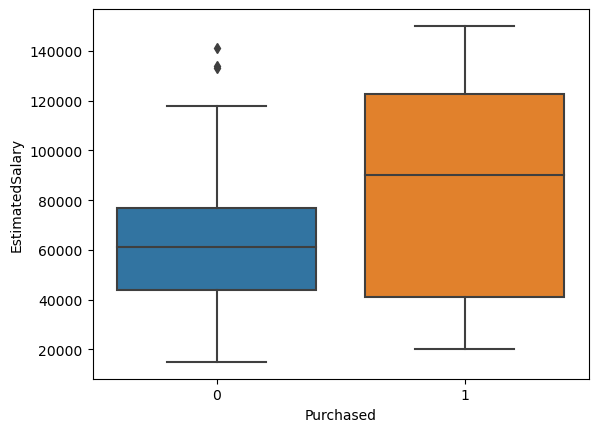

In [11]:
sns.boxplot(x = "Purchased", y = "EstimatedSalary", data = health_insurance);

People that earned higher salary purchased the insurance while those that earned low did not purchase the insurance. Of course, it is expected you purchase a medical insurance when you have money.

# 4. Model building

Importing machine learning models

In [12]:
from sklearn import metrics #Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

Preparing the Data for modeling(Separating features and the label from the data)

**Now is the time to build machine learning models for the task of predicting whether the customers will buy medical insurance or not.** 

Therefore, we shall separate the set of features (X) from the label (Y).

- **X: Represents the features or input variables**. Each row in the X matrix corresponds to a single data point or observation, and each column represents a different feature or attribute of that data point.

- **y: Represents the target variable or label**. For supervised learning tasks, y contains the corresponding labels or output values associated with each data point in X. It is usually a one-dimensional array or vector.


In [13]:
#split data into features and target

X = health_insurance.drop(["Purchased"], axis= "columns") #dropping the label variable (Purchased) from the data

y= health_insurance["Purchased"]

- **X: Contains the features (independent variables)** of the health_insurance dataset. 
**These are the variables used to predict whether a customer purchased insurance or not.**
        
        
- **y: Contains the label (dependent variable)** of the health_insurance dataset, which is the "Purchased" column.

    **This y column contains the information about whether or not a customer purchased insurance.**

In [31]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


As discussed in Previously discussed, we need to create a one-hot encoding for all the **categorical features** in the data because some algorithms cannot work with categorical data directly. They require all input variables and output variables to be **numeric**. 

In this case, we will create a one-hot encoding for the gender feature by using pd.get_dummies(). As shown below:

In [22]:
pd.get_dummies(health_insurance["Gender"])

In fact, pd.get_dummies() is very powerful to actually locate the categorical features and create a one-hot encoding for them. For example:

In [30]:
pd.get_dummies(X)

We now save this result of one-hot encoding into X.

In [20]:
X = pd.get_dummies(X)

In [21]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


Split the data into training and test set

We will split our dataset (Features (X) and Label (Y)) into training and test data by using **train_test_split()** function from the **sklearn**. The training set will be 80% while the test set will be 20%. The random_state that is set to 1234 is for all of us to have the same set of data.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1234)

Now we have the pair of training data(X_train, y_train) and test data (X_test, y_test)

- By setting **random_state** to a fixed value, such as 1234, you ensure that every time you run **the train_test_split** function with the same dataset and the same value of random_state, you'll get the same split of data into training and testing sets. This is crucial for reproducibility in machine learning experiments.

- The specific value you choose for random_state doesn't affect the functionality; what's important is that you use the same value consistently to reproduce the same results across different runs.

# 5. Model training

Model training
We will use the **training data to build the model** and then use **test data to make prediction and evaluation respectively**.

1. Logistic regression:
Let's train a Logistic regression model with our training data. We need to import the Logistic regression from the sklearn model

In [24]:
#Fitting Logistics Regression to the Training set
from sklearn.linear_model import LogisticRegression

Now, let's create an object of class LogisticRegression() to train the model on

In [25]:
#Instance for the logistic regression model
logisticmodel = LogisticRegression()

logisticmodel.fit(X_train, y_train) #Fitting the train set

LogisticRegression()

LogisticRegression()

logisticmodel.fit trained the Logistic regression model. The model is now ready to make prediction for the unknown label by using only the features from the **test data (X_test)**.

In [26]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Let's save the prediction result into logistic_prediction. This is what the model predicted for us.

In [27]:
#Making prediction
logistic_prediction = logisticmodel.predict(X_test)

# 6. Model Evalution

Since we know the true label in the test set (i.e. y_test), we can compare this prediction with it, hence evaluate the logistic model. I have created a function that will help you visualize a confusion matrix for the logistic model and you can call on it henceforth to check the performance of any model.

A confusion matrix is a table used in classification tasks to evaluate the performance of a machine learning model. 
- It allows us to visualize the performance of a classification algorithm by comparing the actual labels of the test data with the predicted labels produced by the model.

In [28]:
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    confmat = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(confmat, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

This Python function, ConfusionMatrix, generates a confusion matrix to evaluate the performance of a classification model. 

Let's break down each component and explain its purpose in details:

**1. Function Definition:**
    **def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):**
This codes defines a function named **ConfusionMatrix** that takes three arguments: **ytest (true labels)**, **ypred (predicted labels)**, and an **optional argument label** that specifies the labels for the classes in the **confusion matrix (default values are "Negative" and "Positive")**.

**2. Function Documentation:** "A beautiful confusion matrix function to check the model performance"
This is a docstring that provides a brief description of the function. It describes the purpose of the function, which is to generate a confusion matrix to evaluate the performance of a classification model.

**3. Importing Libraries:**
from sklearn.metrics import confusion_matrix
import seaborn as sns
This code imports the necessary libraries: confusion_matrix from scikit-learn and seaborn for visualization.

**4. Calculating Confusion Matrix**
confmat = confusion_matrix(ytest, ypred)
This line computes the confusion matrix using the **true labels (ytest)** and the **predicted labels (ypred)** obtained from the classification model.

**5. Plotting the Confusion Matrix:**
        plt.figure(figsize=(7, 5))
        sns.heatmap(confmat, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
        plt.xlabel('Predicted', fontsize = 13)
        plt.xticks([0.5, 1.5], label)
        plt.yticks([0.5, 1.5], label)
        plt.ylabel('Truth', fontsize = 13)
        plt.title('A confusion matrix');

This block of code creates a heatmap visualization of the confusion matrix using seaborn.
- The **heatmap displays** the counts of true positives, true negatives, false positives, and false negatives.
- The **annot=True** argument adds the numerical values in the heatmap cells.
- **cbar=False** removes the color bar.
- **fmt='d'** formats the annotations as integers.
- **cmap='winter'** sets the color map for the heatmap.
- The **x-axis** and **y-axis** labels are set to **"Predicted"** and **"Truth"**, respectively.
- The **tick labels** for the **x-axis** and **y-axis** are set using the specified label argument.
- The title of the plot is set as **"A confusion matrix"**.

By using the ConfusionMatrix() function, then we have:

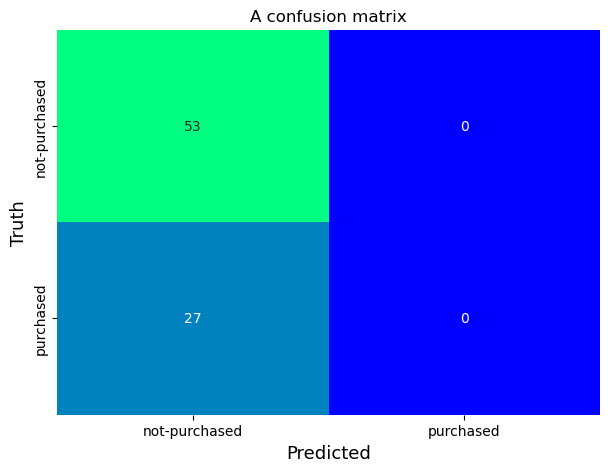

In [29]:
ConfusionMatrix(y_test, logistic_prediction, label = ["not-purchased", "purchased"])

*Interpretation of the Logistics Regression model evaluation performance*

There are 53 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.
There are 27 False Negative (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.
We can check the accuracy by using:

In [24]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

The accuracy of the model is 66.25% .

In [25]:
metrics.f1_score(y_test, logistic_prediction)

0.0

Let's try out other model
Model Selection: is by evaluating different models, including more complex models or ensemble methods, to see if they can better capture the relationships in the data.

# Random Forest Model

Let's train a Random Forest model with our training data. We need to import the Random Forest model from the sklearn module

In [45]:
from sklearn.ensemble import RandomForestClassifier
#Create Random Forest Model
randomforestmodel = RandomForestClassifier()
#Train model
randomforestmodel.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

randomforestmodel.fit() trained the Random Forest model on the training data. The model is now ready to make predictions for the unknown label by using only the features from the test data (X_test).

In [45]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

Let's call the randomforestmodel_prediction method to see the prediction.

In [46]:
randomforestmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

By using the ConfusionMatrix() function, we can see how the model performed


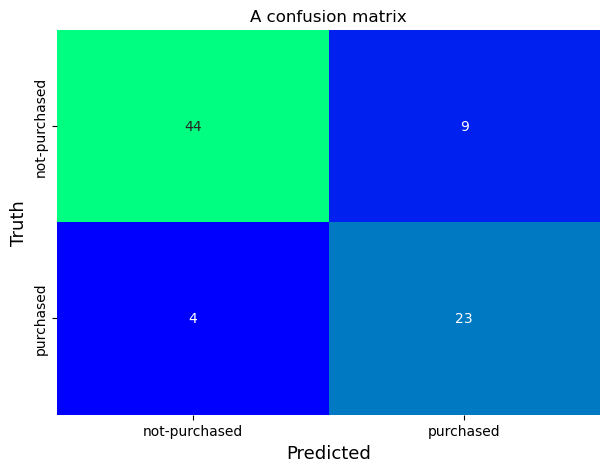

In [47]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label = ["not-purchased", "purchased"])

__Interpretation of the Random Forest model evaluation performance__

- There are 44 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.
- There are 23 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.
- There are 4 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.
- There are 9 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

**<h4>Evaluation metrics for random forest</h4>**

We are going to check the accuracy and F1 score of the model.

We can check the accuracy by using:

In [48]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8375

The accuracy of the model is 84%

We can check the F1 score by using:

The F1 score of the model is 77.97%

As you can see, this model seems good in predicting whether a patient will buy insurance or not.

# DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [71]:
decision_tree_model_prediction = decision_tree_model.predict(X_test)


In [72]:
decision_tree_model_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

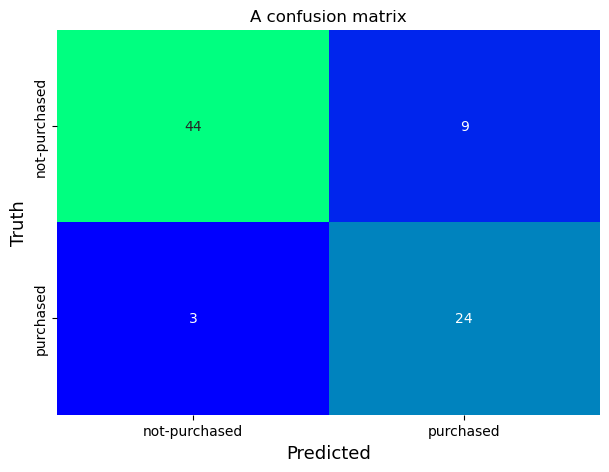

In [73]:
ConfusionMatrix(y_test, decision_tree_model_prediction, label = ["not-purchased", "purchased"])

__Interpretation of the Decision Tree model evaluation performance__

There are 44 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.
There are 24 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.
There are 3 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.
There are 9 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

 **<h3> Evaluation metrics for decision tree</h3>**

So let's check the accuracy and F1 score of the model.


We can check the accuracy by using:

In [74]:
metrics.accuracy_score(y_test, decision_tree_model_prediction)

0.85

The accuracy of the model is 85%

We can also check the F1 score by using:

In [75]:
metrics.f1_score(y_test, decision_tree_model_prediction)

0.7999999999999999

The F1 score of the model is 79%

As you can see, this model seems good in predicting whether a patient will buy insurance or not.

Model Summary

In [77]:
# >>>>>>>>>>>>>>>>>>>>>>>>>> MODEL(S) | ACCURACY | F1-SCORE |<<<<<<<<<<<<<<<<<<<<<<<
#**************************Logistic regression| 66.25 | 0 |**********************
#--------------------------Random Forest | 84 | 77.97| **************************
#--------------------------DECISION TREE | 85 | 79.9|-----------------------------

Having train all the four (4) models, we can see that the best model that can accurately predict whether a Patient will buy health insurance or not is the Decision Tree and Random Forest Model, where there **Accuracy** gives an overall measure of correctness in prediction and F1-score, where the **F1-score** provides a concise summary of a model's ability to make accurate positive predictions while minimizing false positives and false negatives.

Click on the 'green text' below and run the code for SVM


<details>
    <summary>Click <font color="green"><b>this text</b></font> to hide/unhide the hint!</summary>
SOLUTION: Support Vector Machine (SVM)
#Let's train a Support Vector Machine model with our training data. 
    We need to import the Support Vector Machine model from the sklearn module

from sklearn.svm import SVC

SVMmodel = SVC()

SVMmodel.fit(X_train, y_train)

#SVMmodel.fit() trained the Support Vector Machine on the training data. The model is now ready to make predictions for the unknown label by using only the features from the test data (X_test).
SVMmodel_prediction = SVMmodel.predict(X_test)

#You can call on SVMmodel_prediction to see what has been predicted.
SVMmodel_prediction

#By using the ConfusionMatrix() function, we can see how the model performed:
ConfusionMatrix(y_test, SVMmodel_prediction, label = ["not-purchased", "purchased"])


**Output Interpretation of the Support Vector model evaluation performance**

There are 50 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.
There are 14 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.
There are 13 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.
There are 3 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.
    
    
#Evaluation metrics for SVM
So let's check the accuracy and F1 score of the model.

#We can check the accuracy by using:
metrics.accuracy_score(y_test, SVMmodel_prediction)

#The accuracy of the model is 80%

#We can also check the F1 score by using:

metrics.f1_score(y_test, SVMmodel_prediction)

#Further reading: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

</details>

further reading: https://scikit-learn.org/stable/index.html